In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# reading the CSV file
hamburger = pd.read_csv("hamburger.csv")

In [3]:
# Viewing the first 5 records.
hamburger.head()

,subreddit,body
0,BurgerKing,its the old tendercrisp that was used before t...
1,BurgerKing,"Yea, they can get pretty huffy about that stuf..."
2,BurgerKing,"Yes BK delivers , please give all praise and g..."
3,BurgerKing,I did too and it didn't work at all. I told th...
4,McDonalds,I have actually been to this McDonald’s. We w...


In [4]:
# viewing info method.
hamburger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  6000 non-null   object
 1   body       6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [5]:
# removing the "removed" from the body column
hamburger = hamburger.drop(hamburger.loc[hamburger["body"]=="[removed]"].index)

In [6]:
# removing the "deleted" from the body column
hamburger = hamburger.drop(hamburger.loc[hamburger["body"]=="[deleted]"].index)

In [7]:
# viewing info method.
hamburger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5352 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  5352 non-null   object
 1   body       5352 non-null   object
dtypes: object(2)
memory usage: 125.4+ KB


In [8]:
# Using groupby and count functions to view total entries
hamburger.groupby(["subreddit"]).count()

,body
subreddit,
BurgerKing,3476
McDonalds,1876


In [9]:
# Using 0 for BurgerKing, and 1 for McDonalds
hamburger["subreddit"]=hamburger["subreddit"].map({"BurgerKing":0, "McDonalds":1})

In [10]:
# creating X for independent variable
X = hamburger["body"]

# creating y for dependent variable
y = hamburger["subreddit"]

In [11]:
# Using value_counts to see if it is Balanced
y.value_counts(normalize=True)

0    0.649477
1    0.350523
Name: subreddit, dtype: float64

Our datasets balance is 65-35%. This is not much unbalanced. 

In [12]:
# Baseline score
y.mean()

0.3505231689088191

Our baseline score is 35%

In [13]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y)

### Model 1 - Multinomial Naive Bayes

In the first model we are using term frequency–inverse document frequency​ vectorizer.
Our estimator is going to be Multinomial Naive Baise, because our target values are binary.

We are going pass, manually created `English` and `none` stopwords in the vectorizer. Also, for `ngram_range` we are passing (1,1) and (1,3). 

For estimator Hyperparameters, we are going to use [0.01, 0.1, 1] as alpha parameters.

In [14]:
# Instantiating Pipeline with transformer and estimator
pipe = Pipeline([
    ("tfdif",TfidfVectorizer()), #Tfidf will be our transformer
    ("mnb", MultinomialNB())
    # multinomial NB model will be used as estimator
               ])

In [15]:
# parameters dictionary
pipe_params = {
    'tfdif__stop_words': ["none", 'english'],
    'tfdif__ngram_range':[(1,1),(1,2), (1,3)],
    "mnb__alpha":[0.01, 0.1, 1]
}

In [16]:
# instantiating Gridsearch with pipe, and given parameters. Shows limited parameters (verbose=1)
gs = GridSearchCV(pipe, param_grid=pipe_params, verbose=1, cv=5 )

In [17]:
# fitting the model to our data.
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/mem

/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "/Use

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfdif', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'mnb__alpha': [0.01, 0.1, 1],
                         'tfdif__ngram_range': [(1, 1), (1, 2)],
                         'tfdif__stop_words': ['none', 'english']},
             verbose=1)

In [18]:
# checking the best score of the pipeline
gs_best_score = gs.best_score_
gs_best_score

0.992468619246862

In [19]:
# testing dataset score
gs_test_score = gs.score(X_test, y_test)
gs_test_score

0.9949066213921901

In [20]:
# saving the best extimator to a variable
mnb = gs.best_estimator_
mnb

Pipeline(steps=[('tfdif',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('mnb', MultinomialNB(alpha=0.01))])

In [21]:
# Checking the best parameters.
gs.best_params_

{'mnb__alpha': 0.01,
 'tfdif__ngram_range': (1, 2),
 'tfdif__stop_words': 'english'}

In [22]:
# creating prediction and assigning them to an Numpy array
mnb_predict = mnb.predict(X_test)

In [23]:
# we are creating a confusion matrix, and tn, fp, fn, tp variables
tn, fp, fn, tp = confusion_matrix(y_test, mnb_predict).ravel()

# creating a dataframe to present the confusion matrix
mnb_cm = pd.DataFrame(confusion_matrix(y_test, mnb_predict), 
                      index=["Actual Burger King", "Actual McDonald's"], 
                      columns=["Predicted Burger King", "Predicted McDonald's"])
mnb_cm

,Predicted Burger King,Predicted McDonald's
Actual Burger King,1148,0
Actual McDonald's,9,610


In [24]:
# Calculate sensitivity on Multinomial Naive Bayes.

mnb_sens = tp/(tp+fn)

print(f'Sensitivity: {round(mnb_sens, 2)*100}%')

Sensitivity: 99.0%


In [25]:
# Calculate specificity on Multinomial Naive Bayes.

mnb_spec = tn/(tn+fp)

print(f'Specificity: {round(mnb_spec, 3)*100}%')

Specificity: 100.0%


In [26]:
# creating a list of prediction probabilities for McDonald's
mnb_pred_proba = [i[1] for i in mnb.predict_proba(X_test)]

In [27]:
# McDonald's probabilities and true values dataframe
mnb_pred_df = pd.DataFrame({"true_values": y_test, "preds_probs": mnb_pred_proba})

In [28]:
# Creating the ROC score
roc_auc_score(mnb_pred_df["true_values"], mnb_pred_df["preds_probs"])

0.9994342904426045

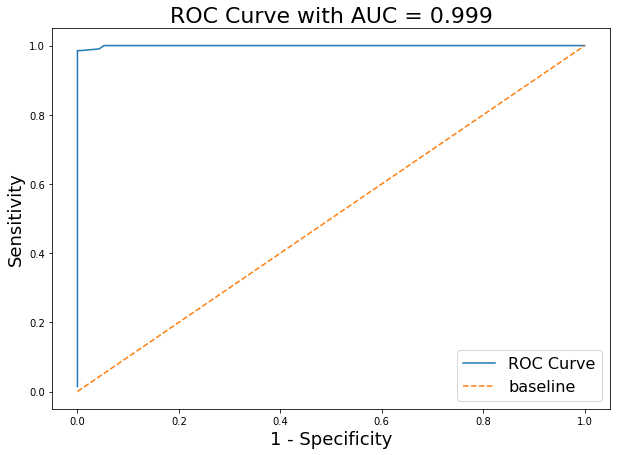

In [29]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(mnb_pred_df, 'true_values', 'preds_probs', prob) for prob in thresholds]
fpr_values = [FPR(mnb_pred_df, 'true_values', 'preds_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(mnb_pred_df["true_values"], mnb_pred_df["preds_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Model 1 - Results 

Our Multinomial Naive Bayes model is very close to a perfect model.
The accuracy score on test data is 98% and on train datasets is 99%.

The best parameters are 0.01 for alpha value; and (1, 2) is the best 'ngram_range' value.

Also, sensitivity is 98% and specificity is 99%.



### Model 2 - K-Nearest Neighbors 

In the second model we are using term frequency–inverse document frequency​ vectorizer.
Our choise of estimator is KNN. 

We are going pass, manually created `stop_words` and `none` stopwords in the vectorizer. Also, for `ngram_range` we are passing (1,1), (1,2) and (1,3). 

For estimator Hyperparameters, we are going to use [3, 5, 7] for number of neighbors. Also, we are going to try both Manhattan distance and Eucledian distance.

In [30]:
# Instantiating the Pipeline
pipe_2 = Pipeline([
    ("tfdif",TfidfVectorizer()), #Tfidf will be our transformer
    ("knn", KNeighborsClassifier()) # KNN model will be used as estimator
               ])


In [31]:
# parameters dictionary
pipe_2_params = { 
    'tfdif__stop_words': ["none", 'english'],
    'tfdif__ngram_range':[(1,1),(1,2), (1,3)],
    "knn__n_neighbors":[3,5,7],
    "knn__p":[1,2],
#     "knn__weights":["uniform", "distance"]   #I was going to pass these hyperparameters but my computer couldn't handle
}

In [32]:
# instantiating Gridsearch with pipe, and given parameters. Shows limited parameters (verbose=1)
gs_2 = GridSearchCV(pipe_2, param_grid=pipe_2_params, verbose=1, cv=3 )

In [33]:
# fitting the train data
gs_2.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/mem

/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "/Use

/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "/Use

/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "/Use

/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "/Use

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfdif', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7], 'knn__p': [1, 2],
                         'tfdif__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tfdif__stop_words': ['none', 'english']},
             verbose=1)

In [34]:
# checking the best score of the pipeline
gs_2.best_score_

0.9868898186889817

In [61]:
# best parameters
gs_2.best_params_

{'knn__n_neighbors': 3,
 'knn__p': 1,
 'tfdif__ngram_range': (1, 1),
 'tfdif__stop_words': 'english'}

In [36]:
# saving the best estimator to a variable
knn = gs_2.best_estimator_

In [37]:
# calculating the score for testing data
knn.score(X_test, y_test)

0.9949066213921901

In [38]:
# creating a numpy array for predictions
knn_predict = knn.predict(X_test)

In [39]:
# we are creating a confusion matrix, and tn, fp, fn, tp variables
tn, fp, fn, tp = confusion_matrix(y_test, knn_predict).ravel()

# creating a dataframe to present the confusion matrix
knn_cm = pd.DataFrame(confusion_matrix(y_test, knn_predict), 
                      index=["Actual Burger King", "Actual McDonald's"], 
                      columns=["Predicted Burger King", "Predicted McDonald's"])
knn_cm

,Predicted Burger King,Predicted McDonald's
Actual Burger King,1148,0
Actual McDonald's,9,610


In [40]:
# Calculate sensitivity on KNN.

knn_sens = tp/(tp+fn)

print(f'Sensitivity: {round(knn_sens, 2)*100}%')

Sensitivity: 99.0%


In [41]:
# Calculate specificity on KNN.

knn_spec = tn/(tn+fp)

print(f'Specificity: {round(knn_spec, 3)*100}%')

Specificity: 100.0%


In [42]:
# creating a list of prediction probabilities for McDonald's
knn_pred_proba = [i[1] for i in knn.predict_proba(X_test)]

In [43]:
# McDonald's probabilities and true values dataframe
knn_pred_df = pd.DataFrame({"true_values": y_test, "preds_probs": knn_pred_proba})

In [44]:
# Creating the ROC score
knn_roc_auc_score = roc_auc_score(knn_pred_df["true_values"], knn_pred_df["preds_probs"])
knn_roc_auc_score

0.997507078405656

### Model 2 Results
Our K-Nearest Neighbors model is also very close to a perfect model. The accuracy score on test is 99%.

We used GridSearchCV to find the optimal parameters.
The best parameters are 0.01 for alpha value; and (1, 2) is the best 'ngram_range' value.

Also, sensitivity is 99% and specificity is above 99%.

### Model 3 - Logistic Regression
In the third model we are using term frequency–inverse document frequency​ vectorizer. 

Our choise of estimator is going to be Logistic Regression.

We are going pass, manually created stop_words and "English" stopwords in the vectorizer. Also, for ngram_range we are passing (1,1), (1,2) and (1,3).

For estimator Hyperparameters, we are going to use both regularizations (Ridge and Lasso). Also, C value choices will be 5.5 and 6. 

In [45]:
# Instantiating the Pipeline.
pipe_3 = Pipeline([
    ("tfdif",TfidfVectorizer()), #Tfidf will be our transformer
    ("lr", LogisticRegression()) # LR model will be used as estimator
               ])


In [46]:
# Parameters dictionary
pipe_3_params ={
    "tfdif__stop_words": ["none", 'english'],
    'tfdif__ngram_range':[(1,1),(1,2), (1,3)],
    "lr__penalty":["l1","l2"],
    "lr__solver":["liblinear"],
    "lr__C":[5.5, 6]
    
}

In [47]:
# instantiating Gridsearch with pipe, and given parameters. Shows limited parameters (verbose=1)
gs_3 = GridSearchCV(pipe_3, param_grid=pipe_3_params, verbose=1, cv=5 )

In [48]:
# fitting the train data
gs_3.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/mem

/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "/Use

/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent c

/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "/Use

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfdif', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [5.5, 6], 'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear'],
                         'tfdif__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tfdif__stop_words': ['none', 'english']},
             verbose=1)

In [49]:
# finding the best score
gs_3.best_score_

0.992468619246862

In [50]:
gs_3.best_params_

{'lr__C': 5.5,
 'lr__penalty': 'l1',
 'lr__solver': 'liblinear',
 'tfdif__ngram_range': (1, 1),
 'tfdif__stop_words': 'english'}

In [51]:
lr = gs_3.best_estimator_

In [52]:
# finding the accuracy on the training data 
lr.score(X_train,y_train)

0.9924686192468619

In [53]:
# finding the accuracy on the testing data 

lr.score(X_test,y_test)

0.9949066213921901

In [54]:
# creating a numpy array for predictions

lr_predict = lr.predict(X_test)

In [55]:
# we are creating a confusion matrix, and tn, fp, fn, tp variables
tn, fp, fn, tp = confusion_matrix(y_test, lr_predict).ravel()

# creating a dataframe to present the confusion matrix
lr_cm = pd.DataFrame(confusion_matrix(y_test, lr_predict), 
                      index=["Actual Burger King", "Actual McDonald's"], 
                      columns=["Predicted Burger King", "Predicted McDonald's"])
lr_cm

,Predicted Burger King,Predicted McDonald's
Actual Burger King,1148,0
Actual McDonald's,9,610


In [56]:
# Calculate sensitivity on Logistic Regression model.

lr_sens = tp/(tp+fn)

print(f'Sensitivity: {round(lr_sens, 2)*100}%')

Sensitivity: 99.0%


In [57]:
# Calculate specificity on Logistic Regression model.

lr_spec = tn/(tn+fp)

print(f'Specificity: {round(lr_spec, 3)*100}%')

Specificity: 100.0%


In [58]:
# creating a list of prediction probabilities for McDonald's
lr_pred_proba = [i[1] for i in lr.predict_proba(X_test)]

In [59]:
# McDonald's probabilities and true values dataframe
lr_pred_df = pd.DataFrame({"true_values": y_test, "preds_probs": lr_pred_proba})

In [60]:
# Creating the ROC score
lr_roc_auc_score = roc_auc_score(lr_pred_df["true_values"], lr_pred_df["preds_probs"])
lr_roc_auc_score

0.9998269097622894

### Model 3 Results

Our Logistic Regression model is also very close to a perfect model. The accuracy score on both test and train datasets is above 99%

We used GridSearchCV to find the optimal parameters. The best parameters are 0.01 for alpha value; and (1, 2) is the best 'ngram_range' value for our transformer.

Also, sensitivity and specificity are above 99%.

## CONCLUSION


We created 3 models in order to make predictions.


Our first model is Multinomial Naive Bayes. We used term frequency–inverse document frequency vectorizer to transform the data. Both the transformer and the estimator were put in the Pipeline. With a group parameters, we used GridSearchCV. The hyperparameters that we passed were `none` and `English` for stopwords; (1,1), (1,2) for ngram_range for vectorizer. We passed the following numbers for alpha value of Multinomial Naive Bayes; 0.01, 0.1, 1. Our GridSearch process fit 60 models to our data. In the first model, the accuracy scores were close to 100%. The   GridSearch also gave us the best parameters. For this model the best hyperparameters are 'alpha': 0.01, 'ngram_range': (1, 2), and the `English` for stop words.



Our second model is K-Nearest Neighbors. We used term frequency–inverse document frequency vectorizer to transform the data. Both the transformer and the estimator were instantiated in the Pipeline. We passed a group of hyperparameters to GridSearchCV. The hyperparamteres that we passed were `none` and `English` for stopwords; (1,1), (1,2) and (1,3) for ngram_range for vectorizer.  
Also we included k=3, k=5, and k=7 for KNN model. Additionally, we searched for Manhattan and Eucledian distances. Our gridsearch process fit 108 models to our data. In this model the accuracy scores were close to 100%. The   GridSearch also gave us the best hyperparameters. The best hyperparameters are 'knn__n_neighbors': 3, 'knn__p': 1, 'tfdif__ngram_range': (1, 1), 'tfdif__stop_words': 'english'.

Our third choice of estimator is Logistic Regression.
We passed  `none` and `English` for stopwords in the vectorizer. Also, for ngram_range we are passing (1,1), (1,2) and (1,3).
For estimator Hyperparameters, we included both regularizations (Ridge and Lasso). Also, C value choices will be 5.5 and 6. Our gridsearch process fit 120 models to our data. In this model the accuracy scores were also close to 100%. The   GridSearch also gave us the best parameters. The best hyperparameters are 'C Value': 5.5, 'penalty': LASSO, 'ngram_range': (1, 1), and `English` for the stop words.  

|Estimator|Transformer|Best Score|Test Data Score| ROC_AUC Score|Sensitivity|Specificity |
|---|-------------|------------|-------------|-----------------------|----------|-------------|
|Multinomial Naive Bayes|TF-IDF| 98% | 99% | 99.8% | 98% | 100% |
|K-Nearest Neighbors|TF-IDF| 97% | 99% | 99.6% | 99% | 99.5% |
|Logistic Regression|TF-IDF| 98.8% | 97% | 99% | 98% | 99.5% |

